In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

importing data

In [8]:
iris_data=pd.read_csv('Iris Dataset.csv')
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Store the 'Species' column in a separate variable for future comparison
species_column = iris_data['Species']

# Drop the 'Species' column from the dataset
iris_data = iris_data.drop('Species', axis=1)

In [28]:
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2


# implementing the K-Means Clustering and Principal Component Analysis (PCA) algorithms

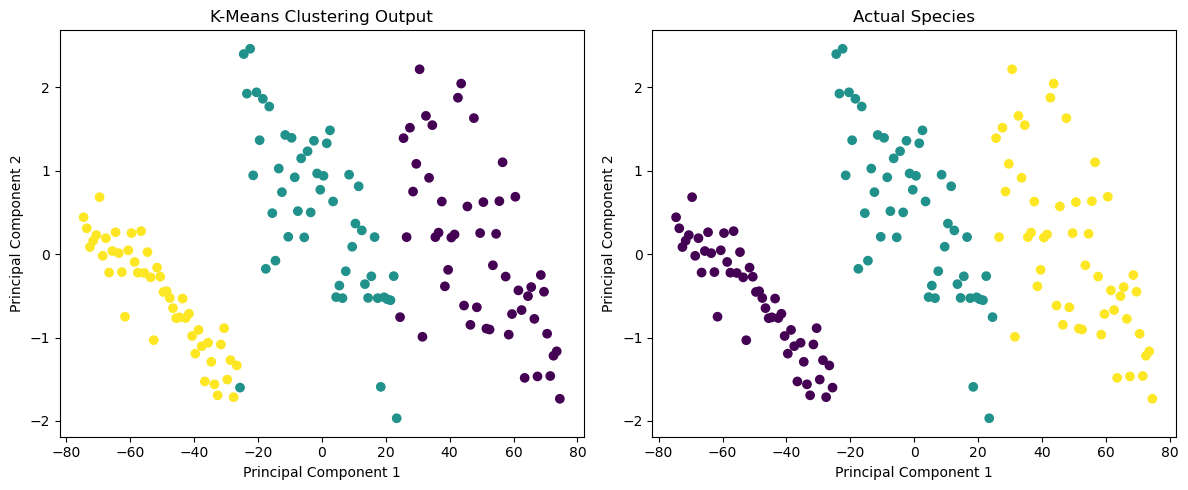

Eigenvalues:
[1.89078098e+03 9.73286632e-01 2.22994729e-01 6.92908368e-02
 2.27360616e-02]

Eigenvectors:
[[ 0.99913157 -0.04071433  0.00712756]
 [ 0.01365776  0.49432522  0.55014214]
 [-0.00396685 -0.01499187  0.77852879]
 [ 0.0358369   0.82236709 -0.29611241]
 [ 0.01579744  0.2783389  -0.05918769]]


In [23]:
# Function to implement K-Means Clustering
def k_means_clustering(dataset, k=3, max_iterations=100):
    # Randomly initialize centroids
    centroids = dataset.sample(k).to_numpy()

    for _ in range(max_iterations):
        # Calculate distances from each data point to centroids
        distances = np.linalg.norm(dataset.to_numpy()[:, np.newaxis] - centroids, axis=2)

        # Assign each data point to the cluster with the closest centroid
        clusters = np.argmin(distances, axis=1)

        # Update centroids based on the mean of data points in each cluster
        new_centroids = np.array([dataset[clusters == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters

# Function to implement Principal Component Analysis (PCA)
def pca_analysis(dataset):
    # Center the data
    centered_data = dataset - np.mean(dataset, axis=0)

    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Project data onto the first three principal components
    projected_data = centered_data.dot(eigenvectors[:, :3])

    return eigenvalues, eigenvectors, projected_data

# Perform K-Means Clustering
k_means_clusters = k_means_clustering(iris_data)

# Perform Principal Component Analysis (PCA)
eigenvalues, eigenvectors, projected_data = pca_analysis(iris_data.to_numpy())

# Visualization of K-Means Clustering and PCA
plt.figure(figsize=(12, 5))

# Plotting output of the cluster
plt.subplot(1, 2, 1)
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=k_means_clusters, cmap='viridis')
plt.title('K-Means Clustering Output')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plotting actual species
plt.subplot(1, 2, 2)
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=pd.Categorical(species_column).codes, cmap='viridis')
plt.title('Actual Species')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Display the first three eigenvectors and their corresponding eigenvalues
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors[:, :3])


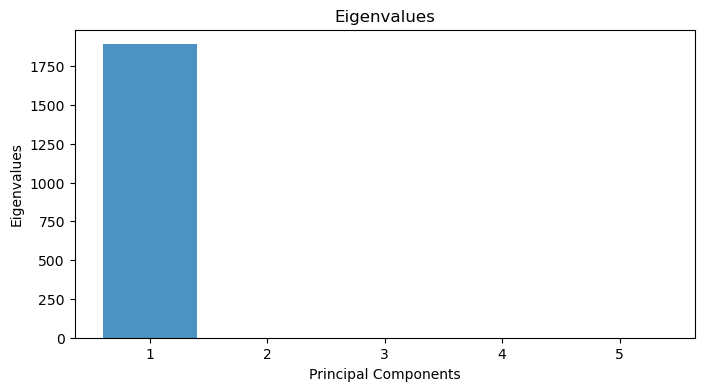

In [24]:
# Plotting Eigenvalues
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, align='center')
plt.title('Eigenvalues')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()


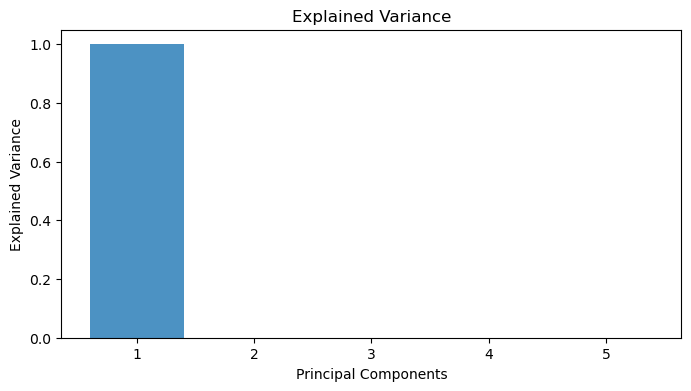

In [25]:
# Calculate the explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)

# Plotting Explained Variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8, align='center')
plt.title('Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()


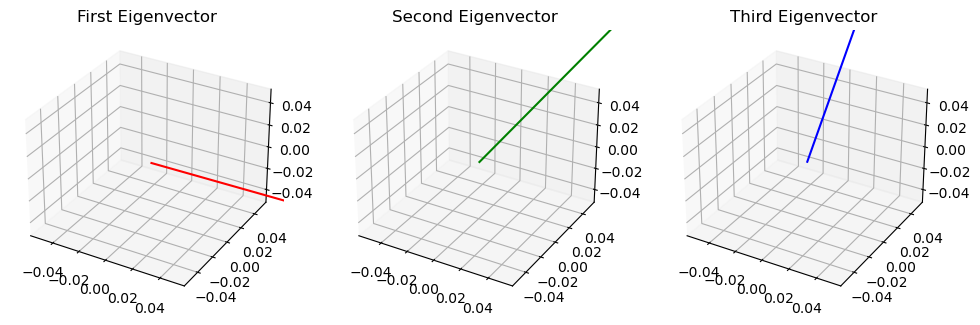

In [26]:
# Plotting the first three eigenvectors
fig = plt.figure(figsize=(12, 5))

# Plotting the first eigenvector
ax = fig.add_subplot(131, projection='3d')
ax.quiver(0, 0, 0, eigenvectors[0, 0], eigenvectors[1, 0], eigenvectors[2, 0], color='r')
ax.set_title('First Eigenvector')

# Plotting the second eigenvector
ax = fig.add_subplot(132, projection='3d')
ax.quiver(0, 0, 0, eigenvectors[0, 1], eigenvectors[1, 1], eigenvectors[2, 1], color='g')
ax.set_title('Second Eigenvector')

# Plotting the third eigenvector
ax = fig.add_subplot(133, projection='3d')
ax.quiver(0, 0, 0, eigenvectors[0, 2], eigenvectors[1, 2], eigenvectors[2, 2], color='b')
ax.set_title('Third Eigenvector')

plt.show()


github link:
https://github.com/nidhikoria/supervised-learning-classification.git